In [3]:
import pandas as pd
import numpy as np

import polars as pl

In [6]:
# try pandas
df_data = pd.read_csv("../data/train.csv")


In [7]:
df_data

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,8985,0,0,0,0,0,0,0,0,0,...,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,0.002457,0.000155,0.001990
8986,8986,0,0,0,0,0,0,0,0,0,...,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,0.002312,0.000156,0.001845
8987,8987,0,0,1,0,0,0,0,0,0,...,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,0.002891,0.000156,0.002424
8988,8988,0,0,0,0,0,0,0,0,0,...,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,0.008310,0.000156,0.007843


<Axes: >

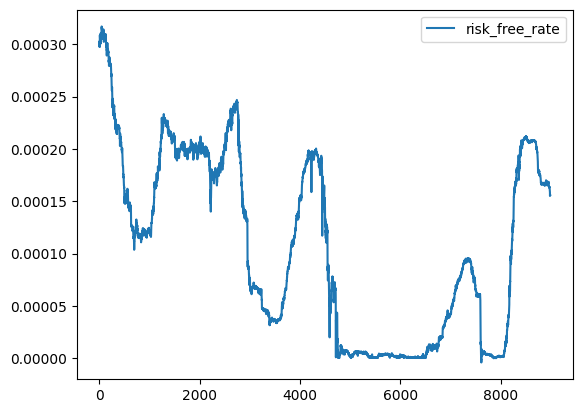

In [11]:
df_data[["risk_free_rate"]].plot()

<Axes: >

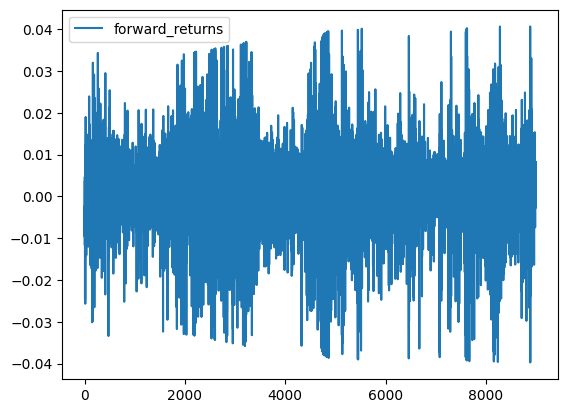

In [12]:
df_data[["forward_returns"]].plot()


<Axes: >

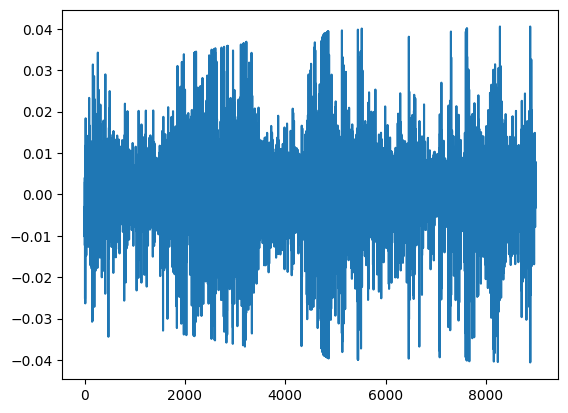

In [13]:
df_data["market_forward_excess_returns"].plot()

<Axes: >

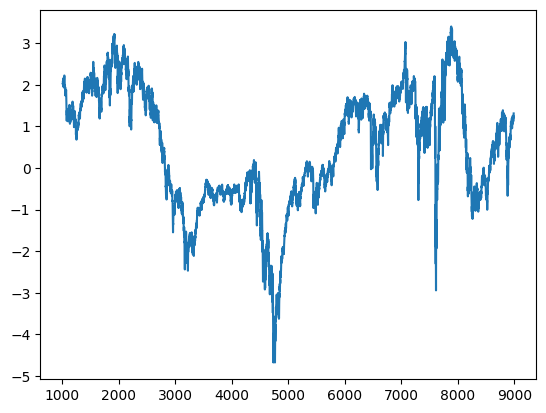

In [16]:
df_data['E2'].plot()

<Axes: >

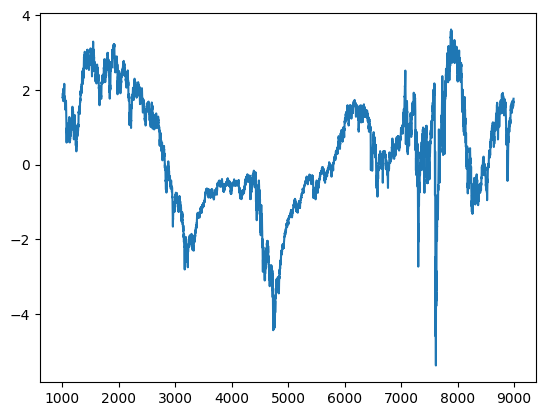

In [17]:
df_data['E3'].plot()

In [20]:
cor_mat = df_data.corr()

In [28]:
cor_mat['forward_returns'].sort_values()

M4                              -0.066591
S2                              -0.037465
E7                              -0.032192
E11                             -0.030796
E12                             -0.029557
                                   ...   
S5                               0.040562
M1                               0.044979
V13                              0.063071
market_forward_excess_returns    0.999957
forward_returns                  1.000000
Name: forward_returns, Length: 98, dtype: float64

In [29]:
cor_mat

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
date_id,1.000000,-0.000537,-0.000537,0.005556,-0.010921,0.001118,-0.001235,0.005398,0.001531,0.000352,...,0.017021,-0.040338,0.160693,0.575225,-0.187103,0.593232,-0.124761,0.004552,-0.519443,0.008912
D1,-0.000537,1.000000,1.000000,-0.004720,0.005976,0.014334,0.009862,-0.033443,0.011701,-0.003009,...,-0.008534,-0.004460,0.006593,-0.008925,0.003433,-0.001031,-0.004937,0.034180,0.001097,0.034185
D2,-0.000537,1.000000,1.000000,-0.004720,0.005976,0.014334,0.009862,-0.033443,0.011701,-0.003009,...,-0.008534,-0.004460,0.006593,-0.008925,0.003433,-0.001031,-0.004937,0.034180,0.001097,0.034185
D3,0.005556,-0.004720,-0.004720,1.000000,0.005975,-0.104801,0.108139,-0.049057,-0.088509,-0.090125,...,0.003335,0.000237,-0.004414,-0.000716,0.001910,0.000996,0.001299,0.005944,-0.008318,0.005988
D4,-0.010921,0.005976,0.005976,0.005975,1.000000,0.006941,-0.007441,-0.000436,0.005435,0.006248,...,0.026498,0.032955,0.016722,-0.095554,0.034774,0.014713,0.077917,0.016584,-0.007370,0.016629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V8,0.593232,-0.001031,-0.001031,0.000996,0.014713,0.000361,0.002594,-0.000439,-0.000922,0.000357,...,0.215965,0.176902,0.100467,0.345442,-0.076632,1.000000,-0.074364,-0.001921,-0.661170,0.003269
V9,-0.124761,-0.004937,-0.004937,0.001299,0.077917,-0.003162,0.005240,0.002753,-0.002809,-0.001945,...,0.092088,0.089618,-0.331279,0.007259,0.978070,-0.074364,1.000000,0.016583,-0.157397,0.016725
forward_returns,0.004552,0.034180,0.034180,0.005944,0.016584,0.016642,0.017044,0.010619,0.024739,0.001143,...,-0.002761,0.001806,-0.002815,0.007651,0.032736,-0.001921,0.016583,1.000000,-0.001126,0.999957
risk_free_rate,-0.519443,0.001097,0.001097,-0.008318,-0.007370,0.000342,0.000953,-0.008695,-0.000802,0.001613,...,-0.054194,-0.039783,-0.084542,-0.348807,0.099386,-0.661170,-0.157397,-0.001126,1.000000,-0.009526


In [30]:
cor_mat['D1'].sort_values()

D7                              -0.033443
E19                             -0.027219
S12                             -0.016638
P5                              -0.015253
S9                              -0.013623
                                   ...   
M15                              0.033157
forward_returns                  0.034180
market_forward_excess_returns    0.034185
D2                               1.000000
D1                               1.000000
Name: D1, Length: 98, dtype: float64

In [31]:
cor_mat['M1'].sort_values()


S8    -0.698026
P10   -0.643386
P8    -0.583308
P11   -0.528744
M10   -0.503946
         ...   
M13    0.640343
V7     0.738409
V9     0.769150
V10    0.856546
M1     1.000000
Name: M1, Length: 98, dtype: float64

In [32]:
cor_mat['E1'].sort_values()


P2               -0.317982
E7               -0.247120
E10              -0.231621
M14              -0.225809
M9               -0.215848
                    ...   
M5                0.209526
risk_free_rate    0.234322
E20               0.238526
E3                0.251678
E1                1.000000
Name: E1, Length: 98, dtype: float64

In [33]:
cor_mat['I1'].sort_values()


I6        -0.461939
E7        -0.280476
date_id   -0.220904
V12       -0.218677
P13       -0.213882
             ...   
E6         0.306456
E10        0.397177
I8         0.414321
I7         0.721311
I1         1.000000
Name: I1, Length: 98, dtype: float64

In [34]:
cor_mat['P1'].sort_values()


V2    -0.666097
V4    -0.648132
V3    -0.616549
V1    -0.608578
M14   -0.531254
         ...   
V10    0.383903
E11    0.390420
I3     0.447565
P13    0.462219
P1     1.000000
Name: P1, Length: 98, dtype: float64

In [35]:
cor_mat['V1'].sort_values()


P1               -0.608578
risk_free_rate   -0.572447
I3               -0.388423
E11              -0.378911
E12              -0.368300
                    ...   
M16               0.667633
V11               0.703440
V8                0.759154
M14               0.762892
V1                1.000000
Name: V1, Length: 98, dtype: float64

In [36]:
cor_mat['S1'].sort_values()


E5    -0.381000
V7    -0.250900
M9    -0.243436
S12   -0.201994
V13   -0.198961
         ...   
M7     0.341132
M13    0.371388
M12    0.447613
E18    0.570723
S1     1.000000
Name: S1, Length: 98, dtype: float64

In [40]:
cor_mat['risk_free_rate'].sort_values()

V8               -0.661170
M14              -0.588059
V1               -0.572447
V12              -0.520421
date_id          -0.519443
                    ...   
P11               0.371340
E6                0.381393
P10               0.437103
P8                0.486076
risk_free_rate    1.000000
Name: risk_free_rate, Length: 98, dtype: float64

In [45]:
df_data[df_data['D1'] == 1]

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
25,25,1,1,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012565,0.000310,0.011938
58,58,1,1,0,1,0,-1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011631,0.000312,0.011001
92,92,1,1,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001212,0.000303,-0.001832
126,126,1,1,0,0,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001894,0.000307,0.001270
160,160,1,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020098,0.000298,-0.020714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,8833,1,1,0,1,0,-1,0,0,0,...,0.447090,0.888228,2.480825,0.478836,-0.498422,0.246362,-0.610331,-0.004483,0.000166,-0.004960
8867,8867,1,1,0,1,0,0,0,0,0,...,0.097222,0.119048,-0.150789,0.605159,0.157398,0.030093,-0.075613,0.010891,0.000166,0.010414
8901,8901,1,1,0,1,0,0,0,0,0,...,0.337963,0.010582,-0.154207,0.736111,0.496703,0.032077,0.380132,0.004205,0.000167,0.003727
8930,8930,1,1,0,0,0,0,0,0,0,...,0.291667,0.455688,1.482460,0.449735,0.097677,0.039683,0.012038,-0.000151,0.000167,-0.000629


In [46]:
df_data.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [47]:
df_data['S1']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8985    0.249933
8986    0.298533
8987    0.371362
8988    0.411610
8989    0.410794
Name: S1, Length: 8990, dtype: float64